In [28]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split

## Read data from csv file 

In [7]:
df = pd.read_csv(glob.glob("*.csv")[0], index_col='Fecha').loc[::-1]

In [8]:
df.head()

,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
Fecha,,,,,,
01.01.2018,752.46,736.77,762.00,717.94,121.56K,2.13%
02.01.2018,858.78,752.46,890.00,752.46,420.96K,14.13%
03.01.2018,942.01,858.78,954.73,840.00,310.54K,9.69%
04.01.2018,940.00,942.01,997.00,893.24,348.62K,-0.21%
05.01.2018,962.77,939.30,"1,023.60",930.00,298.24K,2.42%


In [9]:
assert pd.notnull(df).all().all()

## Clean and get training data 

In [42]:
train_eth = np.array(df['Cierre'].apply(lambda x: float(x.replace(',', '').replace('.', '.'))))

In [43]:
train_X = np.array([np.arange(0, len(df['Cierre']))]).T

In [44]:
test_X =  np.array([np.arange(0, len(df['Cierre']) + 1)]).T

In [45]:
train_eth.shape

(143,)

## KNN

In [46]:
n_neighbors = 2

In [47]:
knn_distance = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
knn_uniform = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform')

In [48]:
knn_distance.fit(train_X, train_eth)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='distance')

In [49]:
knn_uniform.fit(train_X, train_eth)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [50]:
knn_dis_predict = knn_distance.predict(test_X)

In [51]:
knn_uni_predict = knn_uniform.predict(test_X)

## Linear Regression 

## Plots

Text(0,0.5,'USD')

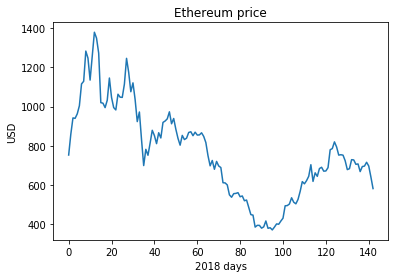

In [52]:
plt.plot(train_X, train_eth)
plt.title('Ethereum price')
plt.xlabel("2018 days")
plt.ylabel('USD')

Price for the last day:  600.8633333333333


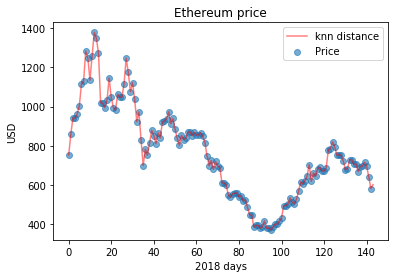

In [53]:
plt.scatter(train_X, train_eth, alpha=0.6, label='Price')
plt.plot(test_X, knn_dis_predict, color='red', alpha=0.5, label='knn distance')

plt.legend()
plt.title("Ethereum price")
plt.xlabel("2018 days")
plt.ylabel("USD")

print("Price for the last day: ", knn_dis_predict[-1])

Price for the last day:  610.775


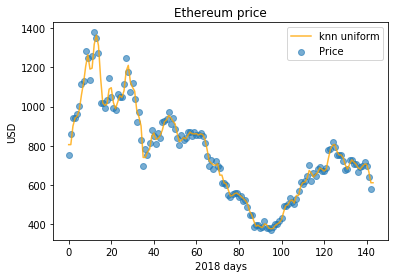

In [54]:
plt.scatter(train_X, train_eth, alpha=0.6, label='Price')
plt.plot(test_X, knn_uni_predict, color='orange', alpha=0.8, label='knn uniform')

plt.legend()
plt.title("Ethereum price")
plt.xlabel("2018 days")
plt.ylabel("USD")

print("Price for the last day: ", knn_uni_predict[-1])

In [55]:
knn_dis_predict.shape

(144,)

In [56]:
knn_distance.predict(144)

array([604.828])

In [57]:
knn_uniform.predict(144)

array([610.775])

In [58]:
(794.988+805.62)/2

800.3040000000001